# TASK 1 - OBJECT DETECTION

### In this program, I have implemented Object Detection using SSD MobileNetv3
- OpenCV is used
- A pre-trained Tensorflow frozen model is used
- Matplotlib is used for visualization and plotting of images and videos
- The database used : COCO containing 80 classes
#### Name: Arnav Shah

#### Importing the Libraries

In [1]:
import cv2   #importing opencv 

In [2]:
import matplotlib.pyplot as plt #importing matplotlib for Visualization

#### Loading the Config file and the Tensorflow Model

In [3]:
config_file= r'C:\Users\Arnav\Documents\Project\Object Detection\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' #config file
frozen_model= r'C:\Users\Arnav\Documents\Project\Object Detection\frozen_inference_graph.pb' #frozen model

#### Loading the model

In [4]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)

#### Labels

In [5]:
classlabels=[]   #empty list to store labels
file_name=r'C:\Users\Arnav\Documents\Project\Object Detection\Labels.txt' #assigning a variable to the text file
with open(file_name,'rt') as fpt: #opening file 
    classlabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(classlabels) 

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


#### Setting up the Configurations

In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001D658297CD0>

## Object Detection In An Image

#### Loading the Image

In [8]:
img=cv2.imread(r'C:\Users\Arnav\Documents\Project\Object Detection\pics\biker-man-motorbike-motorcycle.jpg')

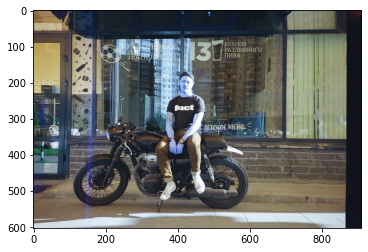

In [9]:
plt.imshow(img) # by default BGR

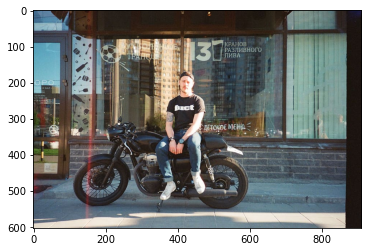

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #Changing to RGB

In [12]:
classIndex,confidence,bbox = model.detect(img,confThreshold=0.5)

In [14]:
print(classIndex) #Here 1 represents person and 4 represents motorbike in our dataset

[[4]
 [1]]


#### Detecting and Plotting Objects in Image

In [15]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2) #plotting the rectangle over the object
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3) 

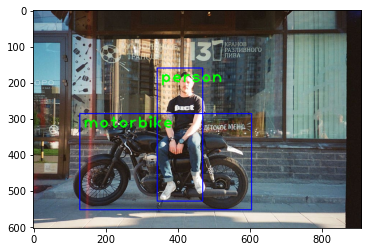

In [16]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

## Object Detection In Video

#### Loading the Video

In [17]:
vid=cv2.VideoCapture(r'C:\Users\Arnav\Documents\Project\Object Detection\Street Footage.mp4')

In [ ]:
#Checking if video is opened properly
if not vid.isOpened():
    vid= cv2.VideoCapture(0)
if not vid.isOpened():
    raise IOError("Cannot open Video")

font_scale=2
font=cv2.FONT_HERSHEY_PLAIN

while True:     #Infinite Loop
    ret,frame=vid.read()
    
    classIndex,confidence,bbox = model.detect(frame,confThreshold=0.5)
    
    print(classIndex)
    if(len(classIndex)!=0):
        for ClassInd,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):                          #Since we have only 80 classes in the dataset
                cv2.rectangle(frame,boxes,(255,0,0),2) #plotting the rectangle over the object
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)
            
    cv2.imshow('Object Detection',frame) #title of the frame window
            
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()

[[ 1]
 [31]
 [ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 2]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 2]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [31]
 [ 1]
 [10]
 [ 1]
 [ 1]
 [ 1]]
[[ 1]
 [ 1]
 [ 2]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 2]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [31]
 [10]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 1]
 [ 1]
 [ 2]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [10]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [27]]
[[ 1]
 [ 2]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [27]
 [ 1]]
[[ 1]
 [ 2]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 1]
 [31]
 [ 1]
 [ 2]
 [ 1]]
[[ 1]
 [ 2]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 1]
 [31]
 [ 1]
 [ 2]
 [ 1]
 [ 1]]
[[ 1]
 [ 2]
 [ 1]
 [ 1]
 [ 1]
 [31]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]
 [10]
 [ 1]
 [31]
 [ 1]
 [ 2]
 [ 1]
 [10]]
[[ 1]
 [ 2]
 